# 데이터 재구조화

In [2]:
import pandas as pd
import numpy as np

## 피벗테이블 (pivot table)
* 원본데이터에서 원하는 열만 선택하여 행과 열에 배치해 새로운 형태의 보고서를 만드는 것
* 원본 데이터에서 인덱스, 컬럼, 값으로 사용할 열을 임의로 선택하여 데이터를 재구조화 할 수 있다
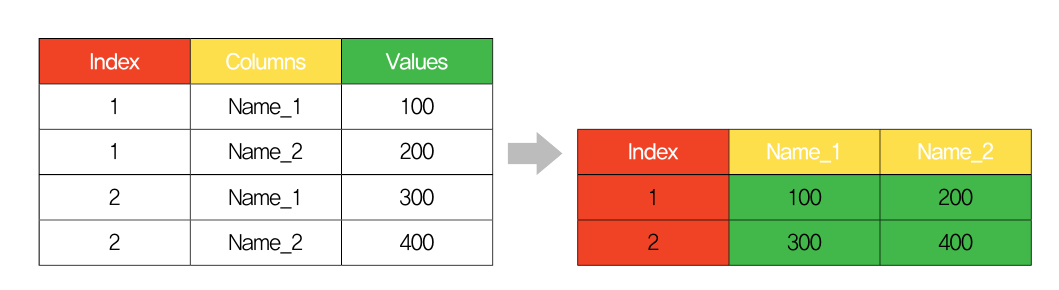

</br></br>
* DataFrame.pivot_table(index = None, columns = None, Values = None, aggfunc = 'mean')
    * index : 피벗 테이블에서 인덱스가 될 컬럼의 이름 (두개 이상이면 리스트로 입력)
    * columns : 피벗 테이블에서 컬럼으로 분리할 컬럼의 이름 (범주형 변수 사용)
    * values : 피벗 테이블에서 columns의 값이 될 컬럼의 이름
    * afffunc : 집계함수를 사용할 경우 지정

In [4]:
score = {'학년':[1, 1, 1, 1, 2, 2], 
         '반':['A', 'A', 'B', 'B', 'C', 'C'], 
         '성별':['여자', '남자', '여자', '남자', '여자', '남자'],
         '성적': [76, 88, 85, 72, 68, 70]}
score

{'학년': [1, 1, 1, 1, 2, 2],
 '반': ['A', 'A', 'B', 'B', 'C', 'C'],
 '성별': ['여자', '남자', '여자', '남자', '여자', '남자'],
 '성적': [76, 88, 85, 72, 68, 70]}

In [5]:
score = pd.DataFrame(score)
score

,학년,반,성별,성적
0,1,A,여자,76
1,1,A,남자,88
2,1,B,여자,85
3,1,B,남자,72
4,2,C,여자,68
5,2,C,남자,70


In [6]:
score = score.pivot_table(index=['학년', '반'], columns='성별', values='성적')
score

성별    남자  여자
학년 반        
1  A  88  76
   B  72  85
2  C  70  68

## 멜트 (melt)
* 피벗테이블의 반대
* 컬럼으로 나열된 자료를 variable과 value 컬럼으로 압축

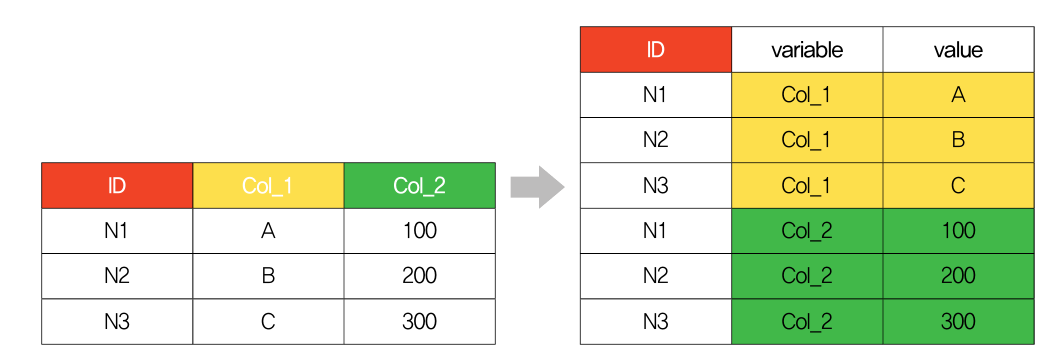
</br></br>

* DataFrame.melt(id_vars = None, var_name = None, value_name = None)
    * id_vars : 피벗 테이블에서 인덱스가 될 컬럼의 이름
      (variable, value 의 내용으로 들어가지 않을 이름 리스트)
    * var_name : variable 변수의 이름으로 지정할 문자열
    * value_name : value 변수의 이름으로 지정할 문자열


In [10]:
score

성별    남자  여자
학년 반        
1  A  88  76
   B  72  85
2  C  70  68

In [9]:
score.reset_index()

성별,학년,반,남자,여자
0,1,A,88,76
1,1,B,72,85
2,2,C,70,68


In [7]:
score.reset_index().melt(id_vars=['학년','반'], var_name='성별', value_name='성적')

,학년,반,성별,성적
0,1,A,남자,88
1,1,B,남자,72
2,2,C,남자,70
3,1,A,여자,76
4,1,B,여자,85
5,2,C,여자,68
